In [12]:
import torch
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import evaluation

from importlib import reload
reload(evaluation)

<module 'evaluation' from '/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/evaluation.py'>

# Load and Check Training results
In this directory the model trainer class stores all embeddings and predictions that were prodcued per epoch.
That way we can monitor how the (2d) embeddings and the class centroids change per epoch.
In this notebook those artifacts get loaded for a sample training run and check for plausibility/correctness.

In [13]:
save_model_subfolder_path = os.getcwd() + "/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240125_1815"

In [14]:
epoch_0_results_path = save_model_subfolder_path + "/epoch_0"

In [15]:
train_embeddings = torch.load(epoch_0_results_path + "/train_embeddings.pt")
print("Nr of training embeddings produced in epoch 1 while training (excluded val samples): " + str(len(train_embeddings)) )

Nr of training embeddings produced in epoch 1 while training (excluded val samples): 45000


### Describe data stored for epoch 0

In [16]:
print(evaluation.describe_epoch_result(epoch_0_results_path))

Describe contents in /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240125_1815/epoch_0
------train_embeddings-------
path: /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240125_1815/epoch_0/train_embeddings.pt
type of data: <class 'list'>
length of data: 45000
type of elements: <class 'list'>
first element: [0.6281577348709106, 0.3842242658138275]
length of single sample: 2
------train_labels-------
path: /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240125_1815/epoch_0/train_labels.pt
type of data: <class 'list'>
length of data: 45000
type of elements: <class 'torch.Tensor'>
first element: 7
shape of single sample: torch.Size([])
------train_predictions-------
path: /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240125_1815

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


max x value:450.9679870605469
max y value:435.17047119140625
max x value:442.870361328125
max y value:423.48773193359375
max x value:369.1146545410156
max y value:355.4222106933594


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


max x value:324.8182678222656
max y value:311.3384704589844
max x value:338.3986511230469
max y value:323.7868347167969


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


max x value:293.5119323730469
max y value:283.7572021484375
max x value:303.7508239746094
max y value:293.26312255859375
max x value:346.1876220703125


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


max y value:330.9236755371094
max x value:431.68072509765625
max y value:417.36590576171875


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


max x value:452.9884033203125
max y value:437.4071044921875


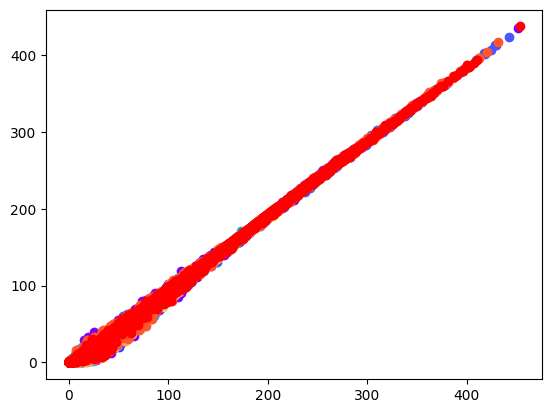

In [21]:
epoch_result_subfolder_path = epoch_0_results_path
embedding_filename = "train_embeddings"
label_filename = "train_labels"
embeddings = torch.load(f"{epoch_result_subfolder_path}/{embedding_filename}.pt", map_location=torch.device('cpu'))
labels = torch.load(f"{epoch_result_subfolder_path}/{label_filename}.pt", map_location=torch.device('cpu'))

embeddings_by_class = []
for class_nr in range(0, 10):
    embeddings_by_class.append([])
    
for embedding, class_nr in zip(embeddings, labels):
    embeddings_by_class[class_nr].append(embedding)
    
colors = cm.rainbow(np.linspace(0, 1, len(embeddings_by_class)))
    
for class_embeddings, color in zip(embeddings_by_class, colors):
    x_values = [embedding[0] for embedding in class_embeddings]
    print(f"max x value:{np.max(x_values)}")
    y_values = [embedding[1] for embedding in class_embeddings]
    print(f"max y value:{np.max(y_values)}")
    plt.scatter(
        x=x_values,
        y=y_values,
        c = color
    )
    
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

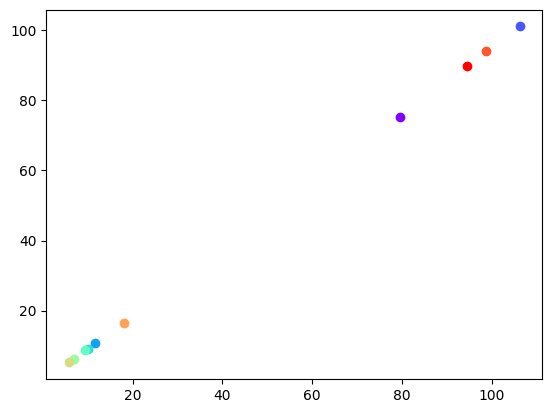

In [23]:
epoch_result_subfolder_path = epoch_0_results_path
embedding_filename = "train_embeddings"
label_filename = "train_labels"
embeddings = torch.load(f"{epoch_result_subfolder_path}/{embedding_filename}.pt", map_location=torch.device('cpu'))
labels = torch.load(f"{epoch_result_subfolder_path}/{label_filename}.pt", map_location=torch.device('cpu'))

embeddings_by_class = []
for class_nr in range(0, 10):
    embeddings_by_class.append([])

for embedding, class_nr in zip(embeddings, labels):
    embeddings_by_class[class_nr].append(embedding)
    
centroids = []
for class_embeddings in embeddings_by_class:
    x_values = [embedding[0] for embedding in class_embeddings]
    y_values = [embedding[1] for embedding in class_embeddings]
    
    x_mean = np.mean(x_values)
    y_mean = np.mean(y_values)
    
    centroids.append([x_mean, y_mean])

colors = cm.rainbow(np.linspace(0, 1, len(embeddings_by_class)))

for centroid, color in zip(centroids, colors):
    plt.scatter(
        x=[centroid[0]],
        y=[centroid[1]],
        c = color
    )

plt.show()